# Understanding Descriptive Statistics

Import the necessary libraries here:

In [50]:
# Libraries
import random 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def roll_dice(times):
    """
    This function simulation a roll of a fair dice (50/50)

    Input: times the roll of dice
    Ouput: dataframe with random values for each roll
    """
    x_axes = [num for num in range(times)]
    out_choices = [random.randint(1,6) for i in range(times)]
    cols=['times', 'value']
    data = dict(zip(x_axes, out_choices))
    df = pd.DataFrame(data.items(), columns=cols)
    df.set_index(['times'],inplace=True)
    return df

#roll_dice(10)

#### 2.- Plot the results sorted by value.

[(0.0, 10.0)]

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Python38\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Python38\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Python38\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002093F8EE4C0>
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line

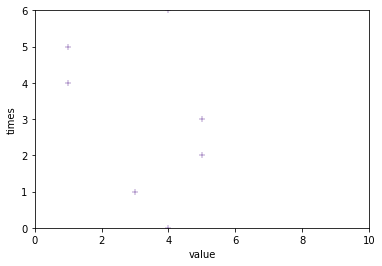

In [57]:
# your code here
data=roll_dice(10)
ax = sns.scatterplot(data=data, x="value", y="times", marker='+',color='rebeccapurple')
ax.set(ylim=(0, 6))
ax.set(xlim=(0,10))

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Python38\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Python38\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Python38\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002093F8F0C10>
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line

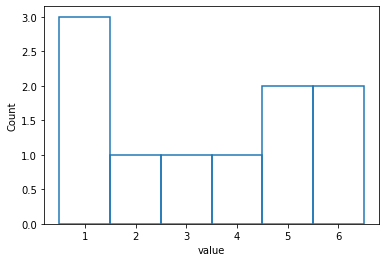

In [56]:
data_freq = pd.value_counts(data['value']).to_frame(name='Frequency').sort_index()

ax = sns.histplot(data, x="value",discrete=True, binwidth=1,fill=False)
plt.show()

In [5]:
"""
your comments here
This plot count the number of times each number was choose and in the first one shows the number choose in each time
"""

'\nyour comments here\nThis plot count the number of times each number was choose and in the first one shows the number choose in each time\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean_fun(df):
    in_lst = data['value'].tolist()
    return sum(in_lst)/len(in_lst)

mean_fun(data)

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
data_freq = pd.value_counts(data['value']).to_frame(name='Frequency').sort_index()
size=data_freq.shape[0]
soma =0 
for i in range(0,size):
    data_num = data_freq.index.tolist()
    data_numb_freq = (data_freq.iloc[:,0]).tolist()
    soma = soma + data_num[i]*data_numb_freq[i]


soma/10

3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here
def median_df(df):
    in_numbers = df['value'].tolist()
    if len(in_numbers) %2 !=0:
        return int(len(in_numbers)/2)
    else:
        num1 = int(len(in_numbers)/2)
        return (in_numbers[num1]+in_numbers[num1+1])/2
median_df(data)

4.5

In [9]:
data

,value
times,
0,1
1,1
2,5
3,6
4,5
5,6
6,3
7,4
8,2


In [10]:
in_numbers = sorted(data['value'].tolist())
size = len(in_numbers)

df1 = pd.DataFrame(in_numbers,columns=['value']) 
df1

,value
0,1
1,1
2,1
3,2
4,3
5,4
6,5
7,5
8,6
9,6


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here
def IQR(df):
    in_numbers = sorted(df['value'].tolist())
    size = len(in_numbers)
    in_min = in_numbers[0]
    in_max = in_numbers[size-1]
    q2 = median_df(df)
    if size %2 == 0: #even
        q1_range = []
        q3_range = []
    else: #odd
        df1 = pd.DataFrame(in_numbers,columns=['value']) 
        median_df(df1)
    return q1, q2, q3
IQR(data)

NameError: name 'q1' is not defined

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

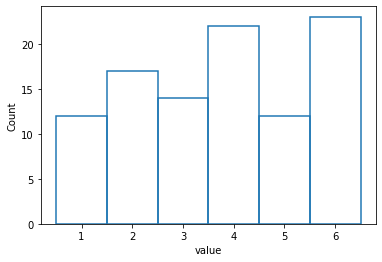

In [15]:
# your code here
dice_data = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_data.columns
dice_data.sort_values(by='value')
ax = sns.histplot(dice_data, x="value",discrete=True, binwidth=1,fill=False)

In [ ]:
"""
your comments here
All numbers appears more than 10 times
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [16]:
# your code here
mean_fun(dice_data)

3.4

#### 3.- Now, calculate the frequency distribution.


In [17]:
# your code here
dice_data_freq = pd.value_counts(dice_data['value']).to_frame(name='Frequency').sort_index().reset_index()
dice_data_freq

,index,Frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Python38\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Python38\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Python38\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000020941112730>
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line

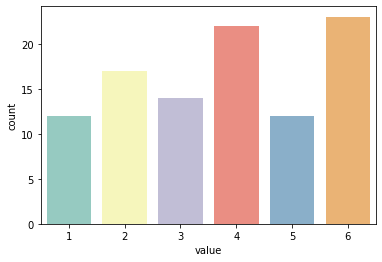

In [66]:
# your code here
ax = sns.countplot(x='value',data=dice_data,palette="Set3")

In [ ]:
"""
The average value will never be obtained because we only have whole numbers in the sample space. Since each number has the same probability of occurring, there will be no preferred value in the histogram.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Python38\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Python38\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Python38\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002093EDBB1F0>
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line

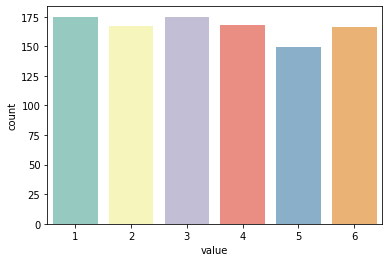

In [64]:
thousand = pd.read_csv('C:/cygwin/home/Cinthya/Ironhack_bootcamp/Descriptive-Stats/data/roll_the_dice_thousand.csv')
#thousand['value'].hist()
ax = sns.countplot(x='value',data=thousand,palette="Set3")
plt.show()

In [ ]:
"""
With the increase in observations, we increased the number of times that each number occurs and since everyone has the same probability of occurring, it can be observed that each one has approximately the same frequency of occurrence.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

The number of people who was asked: 1000
My guesses:
 mean = 30 and std = 10
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Python38\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Python38\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Python38\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002093E802EE0>
Exception in Tkinter callback
Tracebac

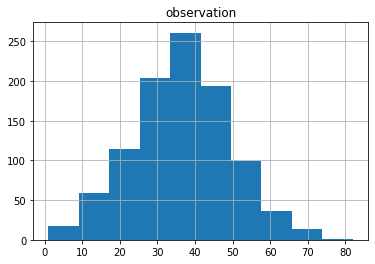

In [74]:
ages = pd.read_csv('../data/ages_population.csv')
print('The number of people who was asked:', ages.shape[0])
print('My guesses:\n mean = 30 and std = 10')

ages.hist()
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [76]:
avg = float(ages.mean())
std = float(ages.std())
print("Average:{0} \nStd:{1}".format(avg,std))

Average:36.56 
Std:12.81649962597677


In [ ]:
"""
My guesses was close to the real values.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Python38\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Python38\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Python38\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002093E7C0520>
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line

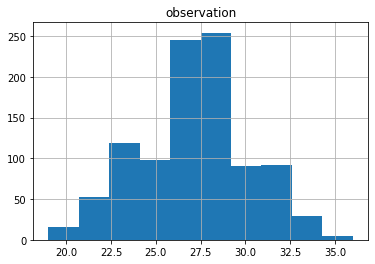

In [78]:
ages2 = pd.read_csv('../data/ages_population2.csv')

ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes. The people who was interviewed in this data was younger than the other.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [79]:
avg2 = float(ages2.mean())
std2 = float(ages2.std())
print("Average:{0} \nStd:{1}".format(avg2,std2))

Average:27.155 
Std:2.9698139326891835


In [ ]:
"""
Both average and std decreases.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Python38\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Python38\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Python38\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002093C2EDC10>
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line

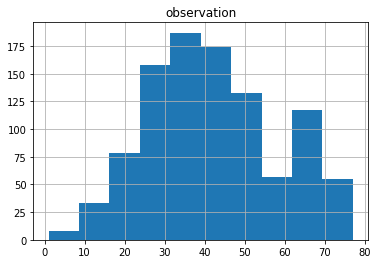

In [82]:
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [83]:
avg3 = float(ages3.mean())
std3 = float(ages3.std())
print("Average:{0} \nStd:{1}".format(avg3,std3))

Average:41.989 
Std:16.14470595986593


In [ ]:
"""
Both average and std incresases.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [104]:
ages['observation'].median()

37.0

In [106]:
import numpy as np

q1=np.quantile(ages['observation'], .75)
q2=np.quantile(ages2['observation'], .75)
q3=np.quantile(ages3['observation'], .75)
print('Four quartile to ages 1: {0}, to ages 2: {1} and to ages 3: {2}'.format(q1,q2,q3))
print('The mean of ages 1: {0}, to ages 2: {1} and to ages 3: {2}'.format(avg,avg2,avg3))
median1 = ages['observation'].median()
median2 = ages2['observation'].median()
median3 = ages3['observation'].median()
print('The median of ages 1: {0}, to ages 2: {1} and to ages 3: {2}'.format(median1,median2,median3))

Four quartile to ages 1: 45.0, to ages 2: 29.0 and to ages 3: 53.0
The mean of ages 1: 36.56, to ages 2: 27.155 and to ages 3: 41.989
The median of ages 1: 37.0, to ages 2: 27.0 and to ages 3: 40.0


In [ ]:
"""
For dataset 2 the values are closer, but for others there is already a greater difference.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [107]:
q1_25=np.quantile(ages['observation'], .25)
q2_25=np.quantile(ages2['observation'], .25)
q3_25=np.quantile(ages3['observation'], .25)
print('Fisrt quartile to ages 1: {0}, to ages 2: {1} and to ages 3: {2}'.format(q1_25,q2_25,q3_25))

Fisrt quartile to ages 1: 28.0, to ages 2: 25.0 and to ages 3: 30.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Python38\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Python38\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Python38\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Python38\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000002093E3597C0>
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python38\lib\tkinter\__init__.py", line

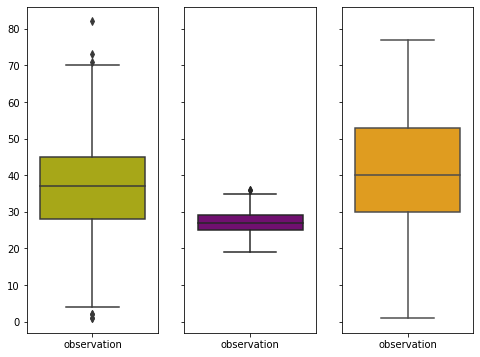

In [123]:
fig, (ax) = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(8,6))
ax[0] = sns.boxplot(data=ages,ax=ax[0],color='y')
ax[1] = sns.boxplot(data=ages2,ax=ax[1],color='purple')
ax[2] = sns.boxplot(data=ages3,ax=ax[2],color='orange')
plt.show()

In [ ]:
"""
Neighborhood 2 has a younger population among all respondents. Neighborhood 3 has an average higher than 1, with a larger number of older people. In neighborhood 1 you can see some outliers, of people over 70 years old and some children.
"""